<a href="https://colab.research.google.com/github/allisonlinn/CSUREMM/blob/main/Modeling_2nd_Try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install google-colab
!pip install sklearn
!pip install statsmodels

from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from statsmodels.tsa.stattools import grangercausalitytests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=bfddb93f0dd39d5edf3456cd3f229454c219438155299d9f5cd2d2e9f266613c
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [18]:
# Upload CSV file from local machine
uploaded = files.upload()

# Get the file name
file_name = next(iter(uploaded))

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_name)

Saving 7_6_23 - Vader + Volatility - Final.csv to 7_6_23 - Vader + Volatility - Final (1).csv


In [19]:
columns =    ["date", "compound","VCDAX_V", "VCSAX_V", "VENAX_V", "VFAIX_V", "VGSLX_V", "VGHCX_V", "VITAX_V", "VMAIX_V", "VSPVX_V", "VTCAX_V",
           "VUIAX_V", "VINAX_V", "VUIAX_P", "VGHCX_P", "VFAIX_P", "VSPVX_P", "VITAX_P", "VMIAX_P", "VGSLX_P", "VINAX_P",
           "VTCAX_P", "VCSAX_P", "VENAX_P", "VCDAX_P"]

columns_affected_V = ["VCSAX_V", "VGSLX_V","VITAX_V"]
columns_affected_P = ["VCSAX_P","VENAX_P","VITAX_P","VUIAX_P"]

data = df[columns].dropna()
data["date"] = pd.to_datetime(data["date"])
date = data.set_index('date')

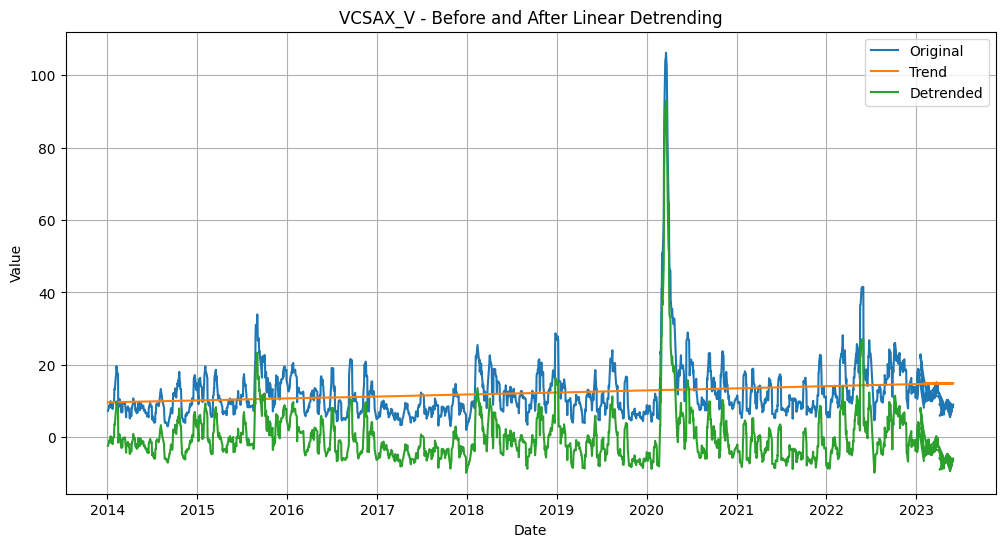

Regression Statistics:
R-value: 0.0338
Slope: 0.0024
Intercept: 9.6750


In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

"""# Filter the dataset and extract relevant columns
columns = ["date", "compound", "VCSAX_V"]
data_new = data[columns]"""

# Extract the values of the "VCSAX_V" column
x = np.arange(len(data))
y = data["VCSAX_V"].values

# Fit a linear regression model to the data
regressor = LinearRegression()
regressor.fit(x.reshape(-1, 1), y.reshape(-1, 1))

# Get the regression statistics
slope = regressor.coef_[0][0]
intercept = regressor.intercept_[0]
r_value = regressor.score(x.reshape(-1, 1), y.reshape(-1, 1))

# Predict the trend using the linear regression model
trend = regressor.predict(x.reshape(-1, 1))

# Subtract the trend from the original values to obtain the detrended series
detrended = y - trend.flatten()

# Replace the "VGHCX_V" column in the dataset with the detrended values
data["VCSAX_V"] = detrended

# Plot the original and detrended series
plt.figure(figsize=(12, 6))
plt.plot(data["date"], y, label="Original")
plt.plot(data["date"], trend, label="Trend")
plt.plot(data["date"], detrended, label="Detrended")
plt.title("VCSAX_V - Before and After Linear Detrending")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Print regression statistics
print("Regression Statistics:")
print(f"R-value: {r_value:.4f}")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")

0      -2.345371
1      -1.501825
2      -0.784301
3      -0.974895
4      -0.747059
          ...   
2925   -7.040753
2927   -6.725229
2929   -7.974823
2930   -6.976987
2931   -9.218440
Length: 2182, dtype: float64


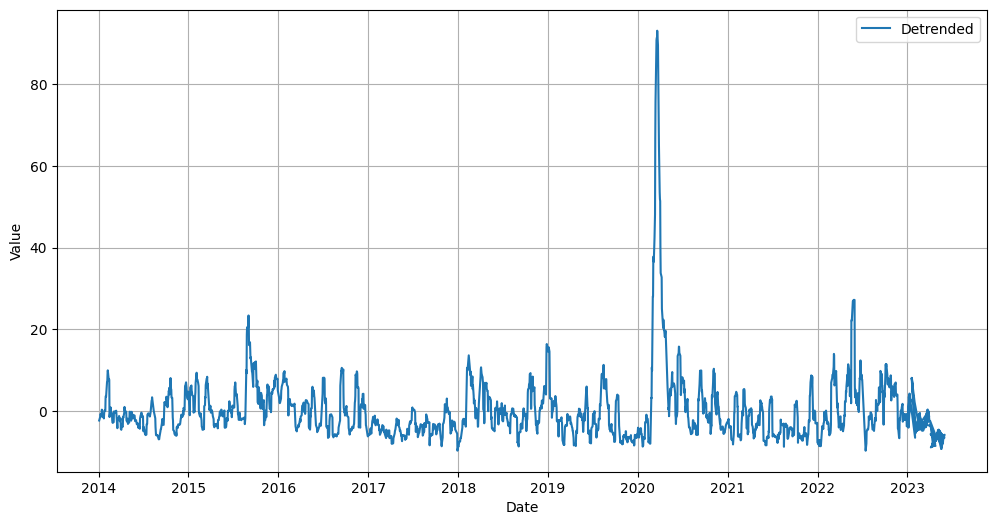

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['VCSAX_V'], model = 'additive', period = 4)
deseason_temp = data['VCSAX_V'] - decomposition.seasonal
print(deseason_temp)

# Plot the original and detrended series
plt.figure(figsize=(12, 6))
plt.plot(data["date"], deseason_temp, label="Detrended")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Save the DataFrame as a !CSV file
deseason_temp.to_csv('adi.csv', index=False)

# Download the !CSV file
files.download('adi.csv')

       datetime  season  seasonal_mean  financial_deviation
0    2014-01-03  winter       0.416784            -2.757749
1    2014-01-07  winter       0.416784            -1.915171
2    2014-01-08  winter       0.416784            -1.235593
3    2014-01-10  winter       0.416784            -1.365015
4    2014-01-13  winter       0.416784            -1.159436
...         ...     ...            ...                  ...
2177 2023-05-17  spring      -6.998593            -0.038722
2178 2023-05-24  spring      -6.998593             0.238856
2179 2023-05-25  spring      -6.998593            -0.949566
2180 2023-05-26  spring      -6.998593             0.026012
2181 2023-05-19  spring      -6.998593            -2.216410

[2182 rows x 4 columns]


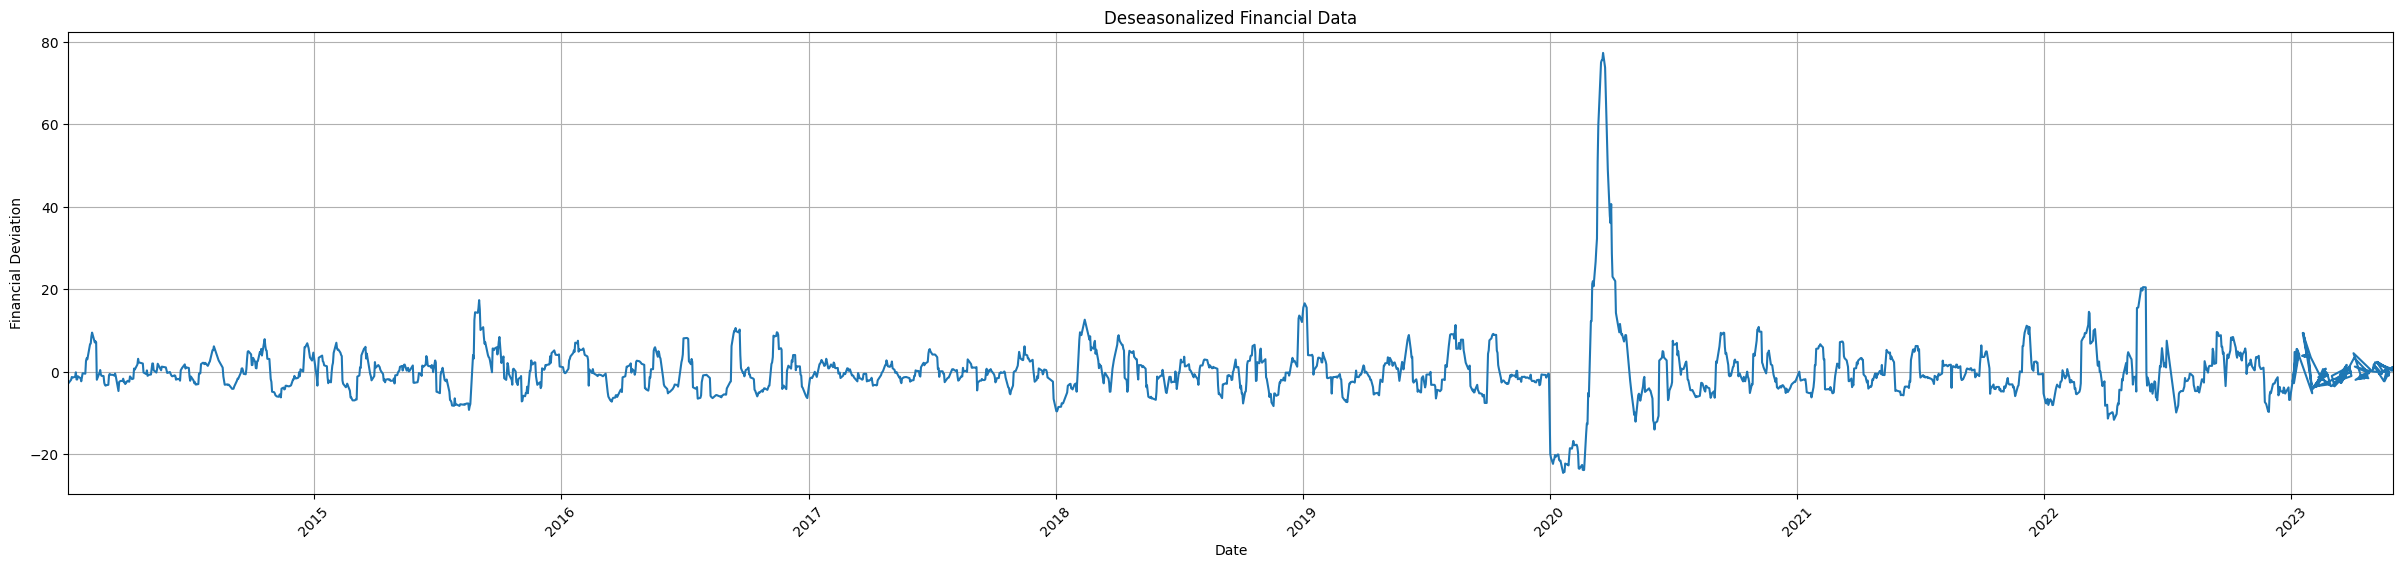

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
from datetime import datetime
import pandas as pd

scores = data['VCSAX_V'].tolist()
date_strings = data['date'].tolist()

date_times = []
months = []

for date_str in date_strings:
        date_times.append(date_str)

for date_time in date_times:
    month = date_time.strftime('%m')
    months.append(month)

new_data = pd.DataFrame({'date': date_strings, 'datetime': date_times, 'months': months, 'VCSAX_V': scores})

seasons = []
for month in months:
    if month in ['01', '02', '03']:
        seasons.append('winter')
    elif month in ['04', '05', '06']:
        seasons.append('spring')
    elif month in ['07', '08', '09']:
        seasons.append('summer')
    else:
        seasons.append('fall')

new_data['season'] = seasons
new_data['year'] = new_data['datetime'].dt.year

mean_values = new_data.groupby(['season', 'year'])['VCSAX_V'].transform('mean')

new_data['seasonal_mean'] = mean_values
new_data['financial_deviation'] = new_data['VCSAX_V'] - mean_values

deseasonalized = new_data[['datetime', 'season', 'seasonal_mean', 'financial_deviation']]
print(deseasonalized)

import matplotlib.pyplot as plt

# Visualize the deseasonalized data
plt.figure(figsize=(30, 6))
plt.plot(deseasonalized['datetime'], deseasonalized['financial_deviation'])
plt.title('Deseasonalized Financial Data')
plt.xlabel('Date')
plt.ylabel('Financial Deviation')
plt.xticks(rotation=45)
plt.xlim(new_data['datetime'].min(), new_data['datetime'].max())  # Set x-axis limits
plt.grid(True)
plt.show()

# Save the DataFrame as a !CSV file
deseasonalized.to_csv('deseasonalized.csv', index=False)

# Download the !CSV file
files.download('deseasonalized.csv')